<a href="https://colab.research.google.com/github/sujitojha1/ERA1/blob/main/Session10/Session10_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Models & Modules

In [124]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [125]:
# Future print function
from __future__ import print_function

# Load modules/models from EVA course
!git clone https://github.com/sujitojha1/ERA1 -q --quiet
!mv ERA1/Session10/*.py .
!rm -rf ERA1
print("Loaded Modules and Models")

# Installing latest Albumentation library
!pip install -U git+https://github.com/albu/albumentations -q --quiet

# For inline matplotlib plotting
%matplotlib inline

Loaded Modules and Models
  Preparing metadata (setup.py) ... done


# Loading train and test data with transforms and loader functions

In [126]:
from data_loader import *

# Loading test and train data & dataloader
cifar10 = dataset_cifar10(batch_size=512)

# Train dataloader
trainloader = cifar10.loader(train_flag=True)

# Test dataloader
testloader = cifar10.loader(train_flag=False)

classes = cifar10.classes

CUDA availability ? True
Files already downloaded and verified
Files already downloaded and verified


In [127]:
len(trainloader),len(testloader)

(98, 20)

In [128]:
98*512, 20*512

(50176, 10240)

In [129]:
50176+10240

60416

# Exploratory Data Analysis

## Summary Statistics

In [130]:
cifar10.data_summary_stats()

Files already downloaded and verified
Files already downloaded and verified
(60000, 32, 32, 3)
[0.49186878 0.48265391 0.44717728]
[0.24697121 0.24338894 0.26159259]


## Plotting sample images

Files already downloaded and verified


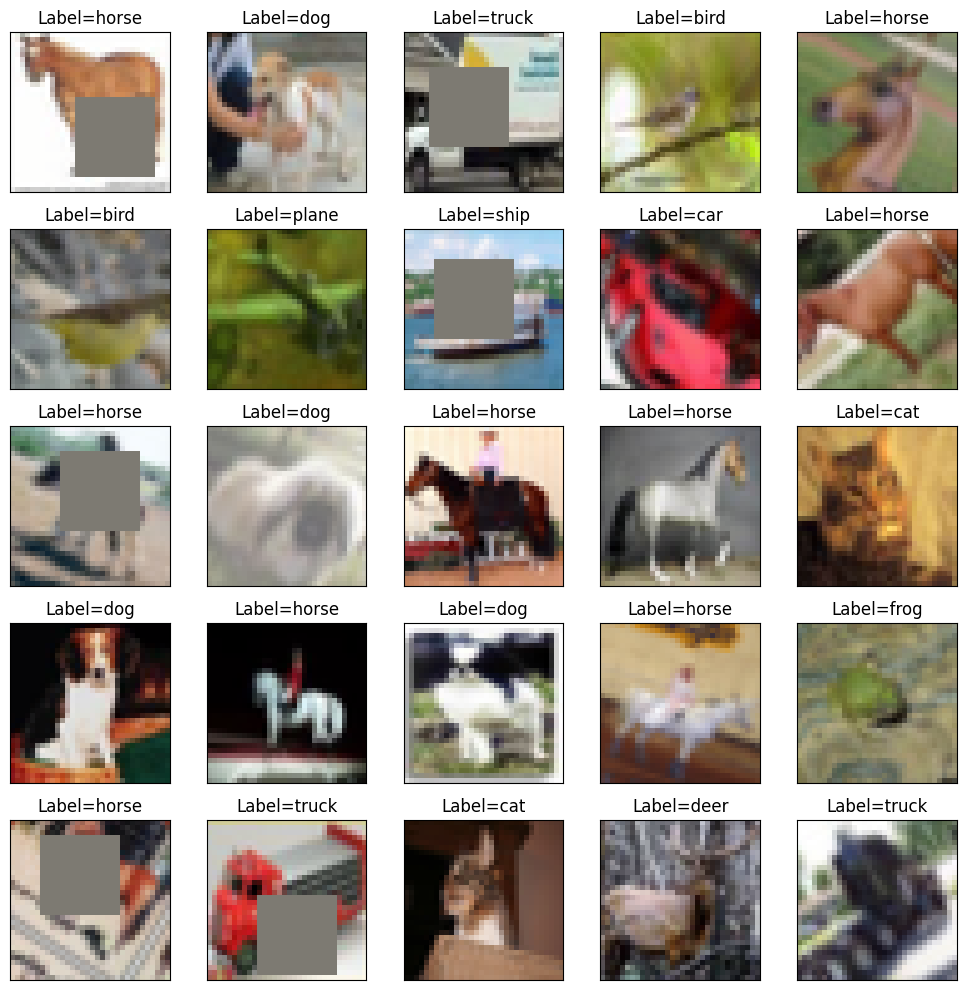

In [131]:
cifar10.sample_pictures(train_flag=True)

## Model

In [132]:
from model import *

# Loading Custom Model
net = Net()

# Using cuda if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

# Sending network to device
net = net.to(device)

cuda


## Model Summary

In [133]:
!pip install torchsummary
from torchsummary import summary

# Model Summary
summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
                 X-8          [-1, 128, 16, 16]               0
            Conv2d-9          [-1, 128, 16, 16]         147,456
      BatchNorm2d-10          [-1, 128, 16, 16]             256
             ReLU-11          [-1, 128, 16, 16]               0
           Conv2d-12          [-1, 128, 16, 16]         147,456
      BatchNorm2d-13          [-1, 128, 16, 16]             256
             ReLU-14          [-1, 128,

## Define a Loss function and optimizer

In [134]:
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=1) #, momentum=0.85)
#scheduler = StepLR(optimizer, step_size=6, gamma=0.2)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.01, steps_per_epoch=len(trainloader),
                                                epochs=24,pct_start=500/2400,
                                                anneal_strategy='linear')

## Training & Testing

Epoch: 0,Loss=1.25 Batch_id=97 Accuracy=46.01: 100%|██████████| 98/98 [00:20<00:00,  4.70it/s]


Test set: Average loss: 0.0026, Accuracy: 5275/10000 (52.75%)



Epoch: 1,Loss=0.93 Batch_id=97 Accuracy=60.00: 100%|██████████| 98/98 [00:20<00:00,  4.72it/s]


Test set: Average loss: 0.0019, Accuracy: 6813/10000 (68.13%)



Epoch: 2,Loss=0.85 Batch_id=97 Accuracy=65.51: 100%|██████████| 98/98 [00:20<00:00,  4.79it/s]


Test set: Average loss: 0.0022, Accuracy: 6301/10000 (63.01%)



Epoch: 3,Loss=1.00 Batch_id=97 Accuracy=67.20: 100%|██████████| 98/98 [00:20<00:00,  4.82it/s]


Test set: Average loss: 0.0022, Accuracy: 6570/10000 (65.70%)



Epoch: 4,Loss=0.74 Batch_id=97 Accuracy=69.55: 100%|██████████| 98/98 [00:20<00:00,  4.80it/s]


Test set: Average loss: 0.0016, Accuracy: 7212/10000 (72.12%)



Epoch: 5,Loss=1.07 Batch_id=97 Accuracy=72.59: 100%|██████████| 98/98 [00:20<00:00,  4.83it/s]


Test set: Average loss: 0.0014, Accuracy: 7761/10000 (77.61%)



Epoch: 6,Loss=0.61 Batch_id=97 Accuracy=76.42: 100%|██████████| 98/98 [00:20<00:00,  4.90it/s]


Test set: Average loss: 0.0013, Accuracy: 7835/10000 (78.35%)



Epoch: 7,Loss=0.51 Batch_id=97 Accuracy=79.69: 100%|██████████| 98/98 [00:19<00:00,  4.91it/s]


Test set: Average loss: 0.0014, Accuracy: 7683/10000 (76.83%)



Epoch: 8,Loss=0.49 Batch_id=97 Accuracy=81.01: 100%|██████████| 98/98 [00:20<00:00,  4.80it/s]


Test set: Average loss: 0.0011, Accuracy: 8134/10000 (81.34%)



Epoch: 9,Loss=0.65 Batch_id=97 Accuracy=82.44: 100%|██████████| 98/98 [00:20<00:00,  4.79it/s]


Test set: Average loss: 0.0009, Accuracy: 8525/10000 (85.25%)



Epoch: 10,Loss=0.53 Batch_id=97 Accuracy=83.76: 100%|██████████| 98/98 [00:20<00:00,  4.76it/s]


Test set: Average loss: 0.0009, Accuracy: 8465/10000 (84.65%)



Epoch: 11,Loss=0.38 Batch_id=97 Accuracy=84.84: 100%|██████████| 98/98 [00:20<00:00,  4.81it/s]


Test set: Average loss: 0.0008, Accuracy: 8680/10000 (86.80%)



Epoch: 12,Loss=0.48 Batch_id=97 Accuracy=86.00: 100%|██████████| 98/98 [00:20<00:00,  4.85it/s]


Test set: Average loss: 0.0007, Accuracy: 8755/10000 (87.55%)



Epoch: 13,Loss=0.38 Batch_id=97 Accuracy=86.80: 100%|██████████| 98/98 [00:19<00:00,  4.90it/s]


Test set: Average loss: 0.0008, Accuracy: 8720/10000 (87.20%)



Epoch: 14,Loss=0.46 Batch_id=97 Accuracy=87.75: 100%|██████████| 98/98 [00:20<00:00,  4.89it/s]


Test set: Average loss: 0.0007, Accuracy: 8868/10000 (88.68%)



Epoch: 15,Loss=0.36 Batch_id=97 Accuracy=88.38: 100%|██████████| 98/98 [00:19<00:00,  4.91it/s]


Test set: Average loss: 0.0007, Accuracy: 8836/10000 (88.36%)



Epoch: 16,Loss=0.27 Batch_id=97 Accuracy=89.36: 100%|██████████| 98/98 [00:20<00:00,  4.86it/s]


Test set: Average loss: 0.0007, Accuracy: 8875/10000 (88.75%)



Epoch: 17,Loss=0.26 Batch_id=97 Accuracy=89.70: 100%|██████████| 98/98 [00:20<00:00,  4.80it/s]


Test set: Average loss: 0.0006, Accuracy: 8940/10000 (89.40%)



Epoch: 18,Loss=0.23 Batch_id=97 Accuracy=90.84: 100%|██████████| 98/98 [00:20<00:00,  4.82it/s]


Test set: Average loss: 0.0006, Accuracy: 8977/10000 (89.77%)



Epoch: 19,Loss=0.20 Batch_id=97 Accuracy=91.11: 100%|██████████| 98/98 [00:20<00:00,  4.83it/s]


Test set: Average loss: 0.0006, Accuracy: 9002/10000 (90.02%)



Epoch: 20,Loss=0.25 Batch_id=97 Accuracy=91.72: 100%|██████████| 98/98 [00:20<00:00,  4.88it/s]


Test set: Average loss: 0.0006, Accuracy: 9063/10000 (90.63%)



Epoch: 21,Loss=0.26 Batch_id=97 Accuracy=92.55: 100%|██████████| 98/98 [00:20<00:00,  4.88it/s]


Test set: Average loss: 0.0005, Accuracy: 9069/10000 (90.69%)



Epoch: 22,Loss=0.19 Batch_id=97 Accuracy=93.15: 100%|██████████| 98/98 [00:20<00:00,  4.90it/s]


Test set: Average loss: 0.0005, Accuracy: 9070/10000 (90.70%)



Epoch: 23,Loss=0.24 Batch_id=97 Accuracy=93.31: 100%|██████████| 98/98 [00:20<00:00,  4.89it/s]


Test set: Average loss: 0.0005, Accuracy: 9117/10000 (91.17%)

Finished Training


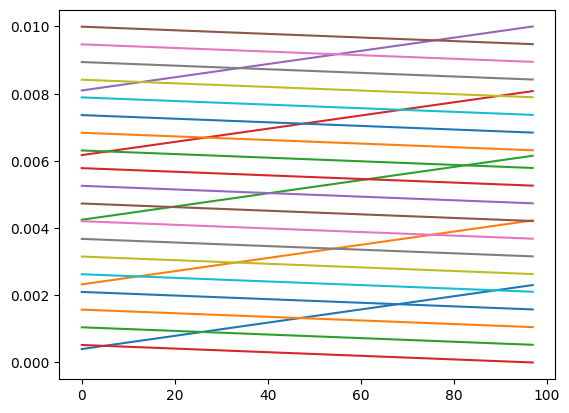

In [135]:
# Load train and test model
from main_new import *

train = train()
test = test()

EPOCHS= 24

for epoch in range(EPOCHS):  # loop over the dataset multiple times
  #train.execute(net, device, batch, optimizer, criterion, epoch)
  train.execute(net, device, trainloader, optimizer, scheduler, criterion, epoch)
  test.execute(net, device, testloader, criterion)

print('Finished Training')

## Display an image from the test set

Files already downloaded and verified


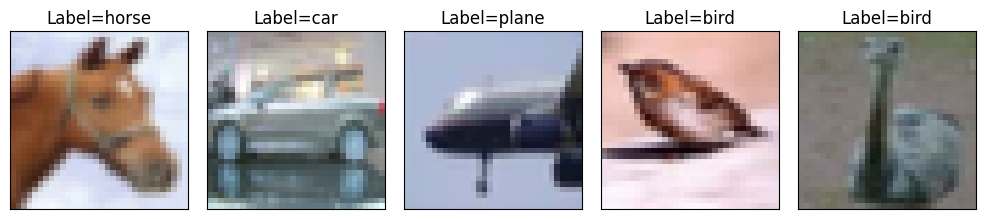

In [136]:
images, labels = cifar10.sample_pictures(train_flag=False, return_flag = True)

## Prediction of sampe test set

In [137]:
images,labels = images.to(device),labels.to(device)
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(5)))

Predicted:  horse   car plane  bird  bird


## Evaluating Training Accuracy

In [138]:
from evaluate import *
calAccuracy(net, trainloader, device)

Accuracy of the network on the  train images: 91.944 %%


## Evaluating Test Accuracy

In [139]:
calAccuracy(net, testloader, device)

Accuracy of the network on the  train images: 91.17 %%


## Evaluating test Accuracy over different classes

In [140]:
calClassAccuracy(net, testloader,classes, device)

Accuracy of plane : 100 %
Accuracy of   car : 100 %
Accuracy of  bird : 77 %
Accuracy of   cat : 66 %
Accuracy of  deer : 71 %
Accuracy of   dog : 100 %
Accuracy of  frog : 90 %
Accuracy of horse : 100 %
Accuracy of  ship : 100 %
Accuracy of truck : 87 %


## Misclassified Images

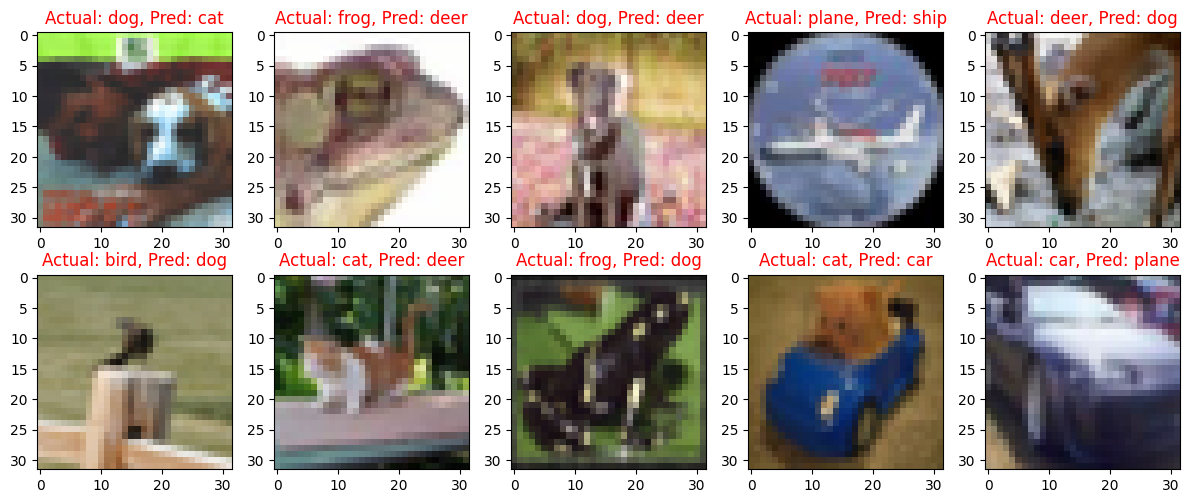

In [141]:
from utils import plot_misclassified_images
plot_misclassified_images(net, testloader, classes, device)